<a href="https://colab.research.google.com/github/pedroavellar/SimulacoesMarkov/blob/master/Simulacoes_CadeiasDeMarkov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Ex 1 - Mosca

O resultado teórico encontrado foi P(Escapar) = 0.2857

OBS: Por motivos da indexação em Python começar em 0, os indíces dos estados foram subtraídos por 1. (Ex: Estado 1 passa a ser Estado 0)

In [3]:
def fly_simulation(P, mosca, aranha, janela):
  if(mosca > len(P)-1 or mosca < 0): # Checa se a posição inicial é válida
    print("Posição inválida")
    return (0,0,0)

  escaped = 0   # Armazena se a mosca escapou ou não
  steps = 0     # Guarda o número de passos dados
  visited = np.zeros(len(P)) #[0,0,0,0,0]
  visited[mosca] = visited[mosca] + 1   # Marca a posição inicial

  while(mosca != janela):

    if(mosca == aranha): # Caso a aranha tenha pegado a mosca, retorna
      return (escaped, steps, visited)

    random = np.random.uniform() # Gera um número aleatório

    aggr = 0
    for i in range(len(P)):
      aggr = aggr + P[mosca][i]
      # Se o número aleatório estiver dentro do agregado atual,
      # passa pro último estado agregado
      if(random < aggr):
        mosca = i
        visited[mosca] = visited[mosca] + 1
        steps = steps + 1
        break
  
  escaped = 1
  return (escaped, steps, visited)


In [9]:
P = [[   0, 1/2,   0, 1/2,   0],
     [ 1/2,   0, 1/2,   0,   0],
     [   0, 1/2,   0, 1/2,   0],
     [ 1/3,   0, 1/3,   0, 1/3],
     [   0,   0,   0,   0,   1]]

mosca = 0
aranha = 2
janela = 4

n = 1000

total_escaped = 0
total_steps = 0
total_visited = np.array([0,0,0,0,0])

for i in range(n):
  (escaped, steps, visited) = fly_simulation(P, mosca, aranha, janela)
  total_escaped = total_escaped + escaped
  total_steps = total_steps + steps
  total_visited = total_visited + visited

print("Probabilidade de escapar sem ser pega pela aranha:")
print(total_escaped/n)
print("Número médio de visitas à cada posição:")
print(list(total_visited/n))

Probabilidade de escapar sem ser pega pela aranha:
0.272
Número médio de visitas à cada posição:
[1.696, 0.86, 0.728, 0.836, 0.272]


In [10]:
# Sem a aranha
aranha = -1

total_escaped = 0
total_steps = 0
total_visited = np.array([0,0,0,0,0])

for i in range(n):
  (escaped, steps, visited) = fly_simulation(P, mosca, aranha, janela)
  total_escaped = total_escaped + escaped
  total_steps = total_steps + steps
  total_visited = total_visited + visited

print(total_escaped/n)
print("Tempo médio pra sair pela janela:")
print(total_steps/n)

1.0
Tempo médio pra sair pela janela:
12.15


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in long_scalars
  if sys.path[0] == '':


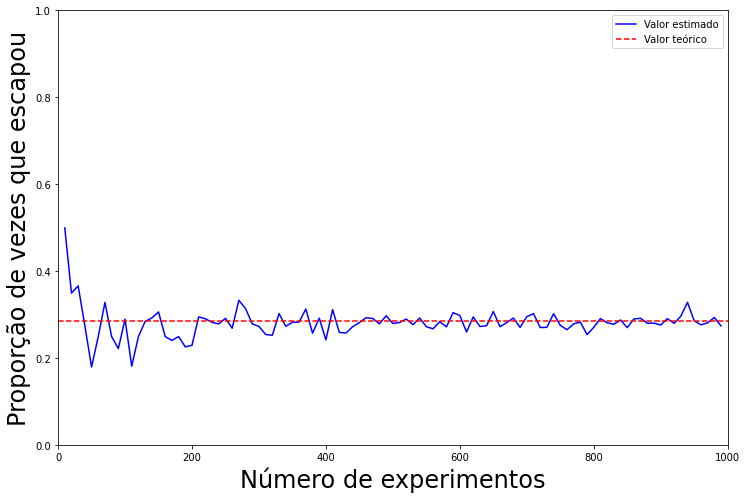

In [11]:
n_max = 1000

nprob = []
nexperim = []

for n in np.arange(0, n_max, 10):
  total_escaped = 0
  for i in range(n):
    (escaped, steps, visited) = fly_simulation(P, mosca = 0, aranha = 2, janela = 4)
    total_escaped = total_escaped + escaped

  nprob.append(total_escaped/n)
  nexperim.append(n)

# Valor teórico
# P(Escapar) = 0.2857

plt.figure(figsize=(12,8))
plt.plot(nexperim, nprob, color="blue", label = "Valor estimado")
plt.axhline(y=0.2857, color="red", linestyle="--", label="Valor teórico")
plt.ylabel("Proporção de vezes que escapou", fontsize=24)
plt.xlabel("Número de experimentos", fontsize=24)
plt.xlim([0, n_max])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show(True)


# Ex 2 - Apostador

O resultado teórico encontrado foi P(A ganhar | X0 = 6) = 0.304

In [38]:
# Confirmando resultado teórico
p = 0.49      # Probabilidade de jogador ganhar
q = 1-p       # Probabilidade de oponente ganhar
ratio = q/p   # q/p
ij = 6        # Stack inicial do jogador
io = 10       # Stack inicial do oponente
N = ij + io   # Fortuna total

U = ((ratio)**ij - (ratio)**N)/(1 - (ratio)**N)
P_t = 1 - U
print(P_t)

0.3025617931565586


In [97]:
def joga_aposta(p, ij, io, debug = 0):
  i = ij
  N = ij+io
  # Joga até perder tudo ou ganhar tudo
  while((i > 0) and (i < N)):
    # Joga uma rodada
    if(np.random.uniform() < p):
      # Jogador ganhou a rodada
      i = i + 1
    else:
      # Jogador perdeu a rodada
      i = i - 1

  if(i == 0):
    if(debug):
      print("Perdeu")
    return 0
  else:
    if(debug):
      print("Ganhou")
    return 1

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in long_scalars
  from ipykernel import kernelapp as app


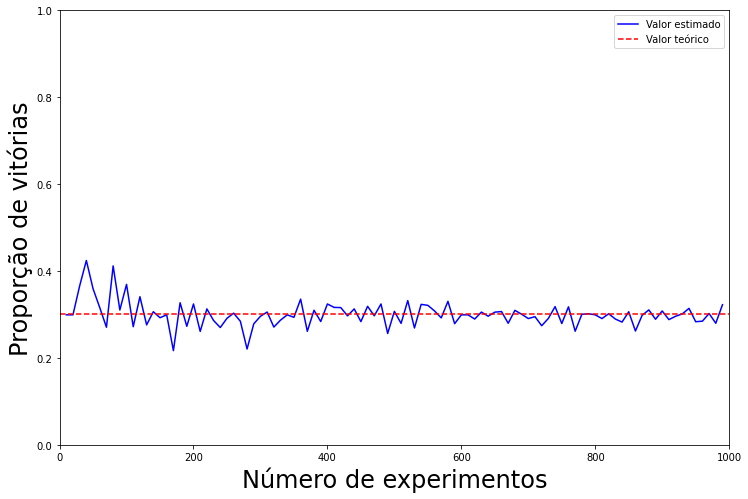

In [125]:
p = 0.49
ij = 6
io = 10

n_max = 1000

nwinrate = []
nexperim = []

for n in np.arange(0, n_max, 10):
  wins = 0
  for i in range(n):
    wins = wins + joga_aposta(p = p, ij = ij, io = io)

  nwinrate.append(wins/n)
  nexperim.append(n)

# Valor teórico
# P_t

plt.figure(figsize=(12,8))
plt.plot(nexperim, nwinrate, color="blue", label = "Valor estimado")
plt.axhline(y=P_t, color="red", linestyle="--", label="Valor teórico")
plt.ylabel("Proporção de vitórias", fontsize=24)
plt.xlabel("Número de experimentos", fontsize=24)
plt.xlim([0, n_max])
plt.ylim([0.0, 1.0])
plt.legend()
plt.show()


# Ex 3 - Moedas

O resultado teórico encontrado foi v0 = (1 + p)/p^2.

In [130]:
for p in (0.25, 0.4, 0.5, 0.6, 0.75):
  v0 = (1 + p)/(p*p)
  print(p, v0)

0.25 20.0
0.4 8.749999999999998
0.5 6.0
0.6 4.444444444444445
0.75 3.111111111111111


In [13]:
def joga_moeda(p = 0.5, goal = 2, debug = 0):
  # p: Probabilidade de sair cara
  # goal: Estado que termina o problema

  state = 0 # Estado representa o número de caras em sequência atual
  jogadas = 0 # Número de jogadas até o momento
  a = [] # Guarda a sequência de caras ou coroas

  # Repete até sair o número de caras desejado
  while(state != goal):
    jogadas = jogadas + 1

    if(np.random.uniform() < p):
      # Saiu cara
      state = state + 1
      if(debug):
        a.append("C")
    else:
      # Saiu coroa
      state = 0
      if(debug):
        a.append("K")

  if(debug):
    print(a)
    print(jogadas)
  return jogadas


In [14]:
p = 0.5
# Valor teórico
v0 = (1 + p)/(p*p)

n = 100
sum = 0
for i in range(n):
  sum = sum + joga_moeda(p = p)
est = sum/n

print("Valor teórico:" + str(v0))
print("Valor estimado:" + str(est))

Valor teórico:6.0
Valor estimado:5.96


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


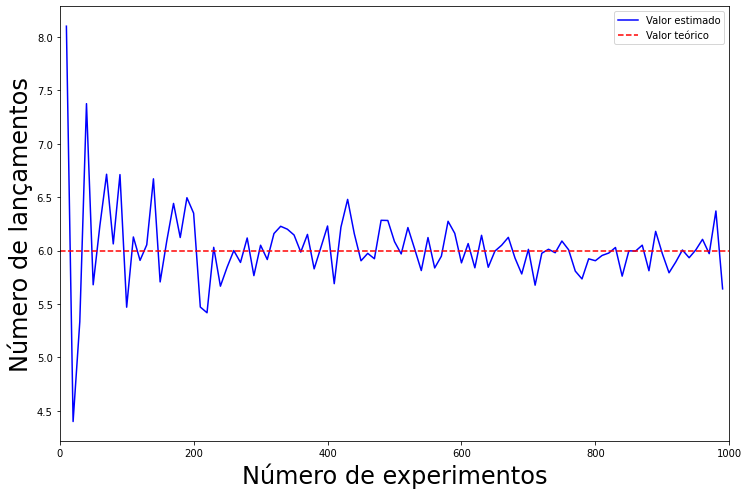

In [28]:
import matplotlib.pyplot as plt

p = 0.5
n_max = 1000

njogadas = []
nexperim = []

for n in np.arange(0, n_max, 10):
  sum = 0
  for i in range(n):
    sum = sum + joga_moeda(p = p)
  est = sum/n

  njogadas.append(est)
  nexperim.append(n)

# Valor teórico
v0 = (1 + p)/(p*p)

plt.figure(figsize=(12,8))
plt.plot(nexperim, njogadas, color="blue", label = "Valor estimado")
plt.axhline(y=v0, color="red", linestyle="--", label="Valor teórico")
plt.ylabel("Número de lançamentos", fontsize=24)
plt.xlabel("Número de experimentos", fontsize=24)
plt.xlim([0, n_max])
#plt.ylim([0.0, 1.0])
plt.legend()
plt.show()

# Ex 4 - Distribuição Estacionária

Distribuição estacionária encontrada: pi1 = 6/32 (0.1875), pi2 = 3/32 (0.0937), pi3 = 6/32 (0.1875), pi4 = 5/32 (0.1562), pi5 = 12/32 (0.375)

In [112]:
distr = [6/32, 3/32, 6/32, 5/32, 12/32] # Distr. estacionária calculada

P = [[   0, 3/6,   0, 1/6, 2/6],
     [   1,   0,   0,   0,   0],
     [   0,   0,   0,   0,   1],
     [ 1/5,   0,   0,   0, 4/5],
     [ 1/6,   0, 3/6, 2/6,   0]]

visits = np.zeros(len(P)) #[0,0,0,0,0]
start_node = 0
steps = 10000

current_node = start_node
# Dá um passo
for walk in range(steps):
  visits[current_node] = visits[current_node] + 1 # Marca o atual como visitado
  random = np.random.uniform() # Gera um número aleatório

  aggr = 0
  for i in range(len(P)):
    aggr = aggr + P[current_node][i]
    # Se o número aleatório estiver dentro do agregado atual,
    # passa pro último estado agregado
    if(random < aggr):
      current_node = i
      break
  
print(list(visits))
print("Comparando simulação e distribuição estacionária, respectivamente:")
print(list(visits/steps))
print(distr)

[1842.0, 900.0, 1901.0, 1580.0, 3777.0]
Comparando simulação e distribuição estacionária, respectivamente:
[0.1842, 0.09, 0.1901, 0.158, 0.3777]
[0.1875, 0.09375, 0.1875, 0.15625, 0.375]
